In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from PIL import Image


In [ ]:
class Histogram_equalization(object):
    def __init__(self, hu_windowing=(-100, 400)):
        self.left, self.right = hu_windowing

    def hu_normalize(self, vol, norm=True):
        vol[vol<=self.left] = self.left
        vol[vol>=self.right] = self.right
        if self.left < 0:
            _left = -self.left
        else:
            _left = self.left
        vol += _left

        if norm:
            vol = vol / (self.right - _left)
        return vol
    
    def get_histogram(self, image, bins):
        # array with size of bins, set to zeros
        histogram = np.zeros(bins)
        
        # loop through pixels and sum up counts of pixels
        for pixel in image:
            histogram[pixel] += 1
        return histogram

    def cumsum(self, a):
        # create our cumulative sum function
        a = iter(a)
        b = [next(a)]
        for i in a:
            b.append(b[-1] + i)
        return np.array(b)

    def __call__(self, volume):
        vol_data = volume.astype(np.int32) # convert to int
        vol_data = self.hu_normalize(vol_data, False)
        bins = self.right - self.left + 1

        vol_flat = vol_data.flatten()
        hist = self.get_histogram(vol_flat, bins)
        cs = self.cumsum(hist) # cumulative hist value

        nj = (cs - cs.min()) * bins
        N = cs.max() - cs.min()
        # re-normalize the cumsum
        cs = nj / N
        cs = cs.astype(np.int32)

        # get the value from cumulative sum for every index in flat, and set that as img_new
        vol_new = cs[vol_flat]
        # put array back into original shape since we flattened it
        vol_new = np.reshape(vol_new, volume.shape)
        return vol_new


In [ ]:
volume_patient = torch.load('/content/drive/My Drive/Tumor_src/Datasets/3Dircad/Zoom_only_05/VOLUME/volume_0.pth')
mask_patient = torch.load('/content/drive/My Drive/Tumor_src/Datasets/3Dircad/Zoom_only_05/VESSEL/volume_0.pth')
volume_patient = volume_patient.numpy()
mask_patient = mask_patient.numpy()
mask_patient.shape

(413, 584, 584)

In [ ]:
vol_data = deepcopy(volume_patient)
mask_data = deepcopy(mask_patient)
vol_data.shape

(413, 584, 584)

In [ ]:
Hist_equal = Histogram_equalization((-100, 400))
vol_new = Hist_equal(vol_data)
print(vol_new.shape)

(413, 584, 584)


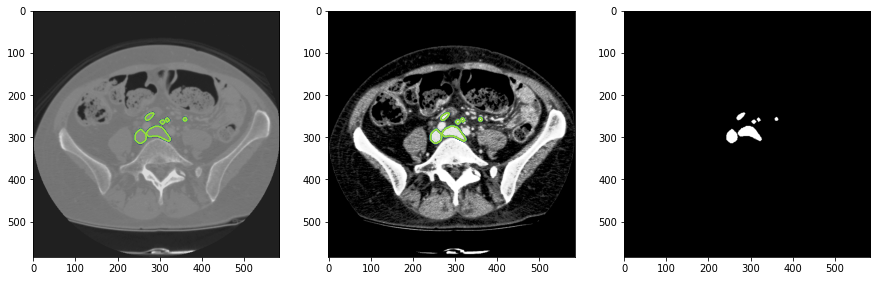

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax[0].imshow(vol_data[0],cmap='gray')
ax[0].contour(mask_data[0]>0)
ax[1].imshow(vol_new[0],cmap='gray')
ax[1].contour(mask_data[0]>0)
ax[2].imshow(mask_data[0],cmap='gray')
plt.show()

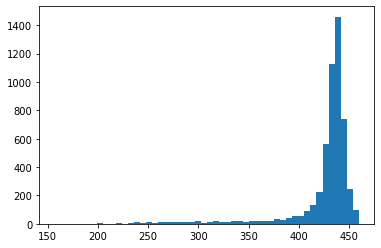

In [ ]:
hu_vessel = vol_equal[mask_data>0]
plt.hist(hu_vessel.ravel(), bins=50)
plt.show()

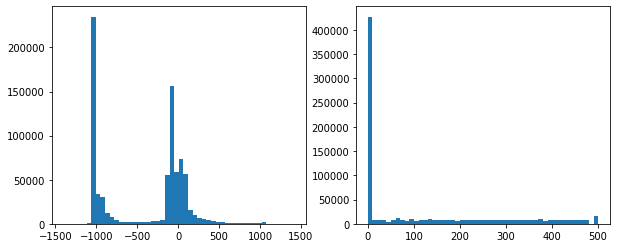

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].hist(vol_nonnorm.ravel(), bins=50)
ax[1].hist(vol_equal.ravel(), bins=50)
plt.show()

In [ ]:
volumes = torch.load('/content/drive/My Drive/main_src/dataset/vol_train.pth')
masks = torch.load('/content/drive/My Drive/main_src/dataset/mask_train.pth')

In [ ]:
volumes.shape


torch.Size([9742, 1, 128, 128])

In [ ]:
masks.shape

torch.Size([9742, 1, 80, 80])

In [ ]:
masks.sum()/ (9742*80 *80)

tensor(0.1167)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)

x = np.random.normal(size=100)
sns.distplot(x);

In [ ]:
data05 = '/content/drive/My Drive/Tumor_src/Datasets/3Dircad/Zoom_only_05'
volpth = data05 + '/VOLUME'
livpth = data05 + '/LIVER'
vespth = data05 + '/VESSEL'

In [ ]:
lst = [3, 10, 0, 5, 16, 18]
range_hist = (-150, 450)

hu = np.array([])

for idx in range(20):
    if idx in lst:
        continue
    print("Patient #",idx)
    vol_path = volpth + f'/volume_{idx}.pth'
    ves_path = vespth + f'/volume_{idx}.pth'

    vol_ori = torch.load(vol_path).numpy()
    ves_ori = torch.load(ves_path).numpy()

    hu_ves = vol_ori[ves_ori>0]
    hu = np.append(hu, hu_ves)
    print(hu_ves.shape, hu.shape)

    del vol_ori, ves_ori


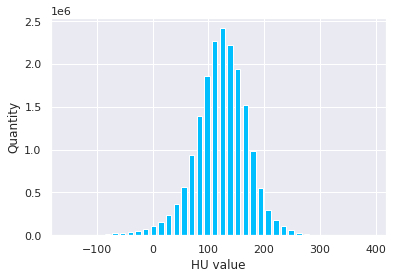

In [ ]:
range_hist = (-150, 400)
hu_hist = np.histogram(hu, bins=40, range=range_hist)
plt.bar(hu_hist[1][:-1], hu_hist[0], 10, color='deepskyblue')
plt.xlabel('HU value')
plt.ylabel('Quantity')
plt.show()

In [ ]:
pth = '/content/drive/My Drive/main_src/dataset/data3d_025/data92_train/masks/vol_0.pth'
a = torch.load(pth)